# Huffman Compression Algorithm

## Disclaimer: Personal Interest in This Area

When I was in 8th grade in 1998, I was fascinated by the LZW compression algorithm and I attempted an implementation in C. Of course, I lacked the required knowledge and skills back then. So I implemented a simple RLE encoder and decoder instead. I even extracted it as a Linux .so library and then developed a simple frontend with gzip/gunzip syntax. Unfortuntely, this early achievement, developed on an ancient 486DX4 100MHz machine, was lost in the sands of time.

Several years later, I attempted to create an MP2 (MPEG-1 Audio Layer II, not MP3) decoder. I failed miserably. :)

I have always been fascinated with lossy compression - primarily audio and video. I spent a decade comparing various audio codecs like MP2, MP3, AAC, Vorbis, and lately Opus and I'm very well trained to spot the flaws in their psychoacoustic (perceptual) models of the human ear at lower bitrates. :) I have extensive interests in video compression and I've always been fascinated by the various techniques emplyed in codecs like H.264, H.265, VP9 and lately AV1.

In 2008 I implemented the official Direct3D YV12/YUY2 video renderer for the open-source video player MPlayer to support Windows Vista's desktop composition. 

Offtopic: Back in 1997 or so my Matsushita CD-ROM drive used to skip often when playing Audio (Red Book) CDs, so I implemented a program to read the data in advance in a ring buffer at higher speed, skip and interpolate (far from perfect) the unreadable sectors and play beautifully my black metal CDs. Since then I have always adored error correction like Cross-interleaved Reed-Solomon codes (CIRC) used in data CDs.

## Introduction

Huffman coding is a lossless data compression algorithm. The idea is to assign variable-length codes to input characters. The lengths of the assigned codes are based on the frequencies of corresponding characters.

The variable-length codes assigned to input characters are Prefix Codes. They are assigned in such a way that the code assigned to one character is not the prefix of code assigned to any other character. This is how Huffman Coding makes sure that there is no ambiguity when decoding the generated bitstream. [1]

## Lossless and Lossy Compression

Compression in general is a transformation that takes as input some data and produces an output of the same data that takes less space. Decompression is the reverse process in which the compressed data occupying less space is expanded back to its original form in the case of losless compression or close to its original form in the case of lossy compression.

Lossless compression is a complteley reversible operation. The original data can be reconstructed back in its original form with no data loss of any kind. It is suitable for data like text, source and compiled code, etc. The main advantage of lossless compression is that no data loss occurs. The main disadvantage compared to lossy compression is that the compression ratio is lower.

Lossy compression results in a compressed data that discards some non-essential piece of the original data. This allows for much better compression ratio than lossless compression at the expense of some inevitable data loss.

Suitable data for lossy compression are images, audio, video, etc. This kind of data is usually not very sensitive to small changes. For example, a small change in the color of a pixel in an image is not very noticeable to the human eye. Similarly, a small change in the sound of a single sample in an audio file is not very noticeable to the human ear.

Lossless compression generally works be employing some form of de-duplication. Data that can be derived from earlier data is represented as a pointer to this earler data. Or less data is used to describe often repeating parts of the input.

One of the main ideas behind lossy compression systems is quantization. This is a process in which similar/close values are mapped into only one value. Lossy compression systems almost always include lossless parts as well for efficiency.

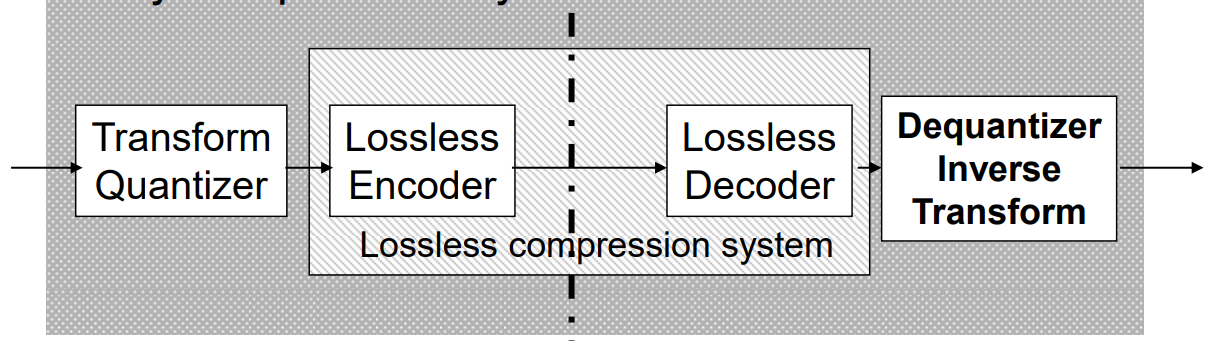

### Entropy

Information theory is the mathematical study of the quantification, storage, and communication of information. A key measure in information theory is entropy. Entropy quantifies the amount of uncertainty involved in the value of a random variable or the outcome of a random process.[10]

Entropy coding (or entropy encoding) is any lossless data compression method that attempts to approach the lower bound declared by Shannon's source coding theorem, which states that any lossless data compression method must have expected code length greater or equal to the entropy of the source. [11]

Entropy is the "randomness" of the input data. The less random the data, the more it can be losslessly compressed. However, we can't compress it beyound a particular point. Completely random data is not compressible at all. All lossless algorithms essentially try to represent the input data with smaller amount of bits. There is a point after which no further compression is possible. For example, if we try to compress a ZIP file once again, we won't be able to de-duplicate the data to represent it with fewer amount of bits as this was already done.


### Fixed vs Variable-length Encoding

If we take text as an example, each character is usually represented using a fixed-length number of bits. For example the ASCII (American Standard Code for Information Interchange) standard uses 8 bits per character, so each character is represented using the same number of bits.

However, we can do the following:

* Analyze the whole text and find how often each characters appears
* Sort the characters by frequency of appearance
* Encode the most frequent appearing characters with fewer bit than ones that appear rarely

We can't, however, just assign for example the shortest amount of bits to each character. This will lead to ambiguity while decoding.

For example:

| Symbol | Encoding in bits |
| --- | ----------- |
| a | 0 |
| b | 11 |
| c | 100 |
| d | 011 |

So, the string aabacdab will be encoded to 00110100011011 (0|0|11|0|100|011|0|11) using the above codes. But the real problem lies in decoding. If we try to decode the string 00110100011011, it will lead to ambiguity as it can be decoded to:

| Decoding interpretation | Decoded string |
| --- | ----------- |
| 0\|011\|0\|100\|011\|0\|11 | adacdab |
| 0\|0\|11\|0\|100\|0\|11\|011 | aabacabd |
| 0\|011\|0\|100\|0\|11\|0\|11 | adacabab |

So the problem with variable-lenght isn't encoding. The real problem lies in the ambiguity while decoding. Huffman coding solves this problem. [2]

## Huffman Coding

The technique works by creating a binary tree of nodes. A node can be either a leaf node or an internal node. Initially, all nodes are leaf nodes, which contain the character itself, the weight (frequency of appearance) of the character. Internal nodes contain character weight and links to two child nodes. As a common convention, bit 0 represents following the left child, and a bit 1 represents following the right child. A finished tree has n leaf nodes and n-1 internal nodes. It is recommended that Huffman Tree should discard unused characters in the text to produce the most optimal code lengths.

### Building the Huffman Binary Tree

We will use a priority queue for building the frequency-sorted Huffman binary tree. In the priority queue the node with the lowest frequency has the highest priority. Following are the complete steps:

1. Create a leaf node for each character and add them to the priority queue.
2. While there is more than one node in the queue:
* Remove the two nodes of the highest priority (the lowest frequency) from the queue.
* Create a new internal node with these two nodes as children and a frequency equal to the sum of both nodes’ frequencies.
* Add the new node to the priority queue.
3. The remaining node is the root node and the tree is complete.


### Huffman Tree as Prefix Code

A unique property of the resulting Huffman tree is that the code used to represent each character is choosen in a way that it is never a prefix of another character. So no original text's character representation (as binary code) is a part of another original text's character representation (as binary code).

This makes "Huffman code" synonymous for "prefix code" even when such a code is not produced by Huffman's algorithm.

### Example Huffman Tree Construction

Consider the following example[3]:

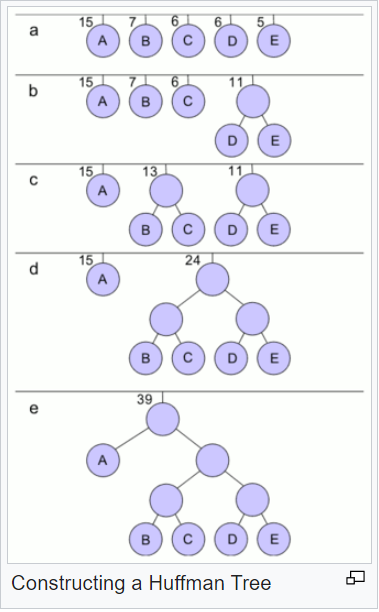

(a) First the letters are sorted by frequency in the original text.

(b) The last ones, D and E are converted into leaves with common node that has as value their frequency sum, 11.

(c) Then the same happens for B and C, resulting in a node with value equal to their frequency sum of 13

(d) Nodes with values 13 and 11 are converted into leaves of a new root node with new sum of 24

(e) Finally, the nodes with values 15 and 24 are merged into the final root node.

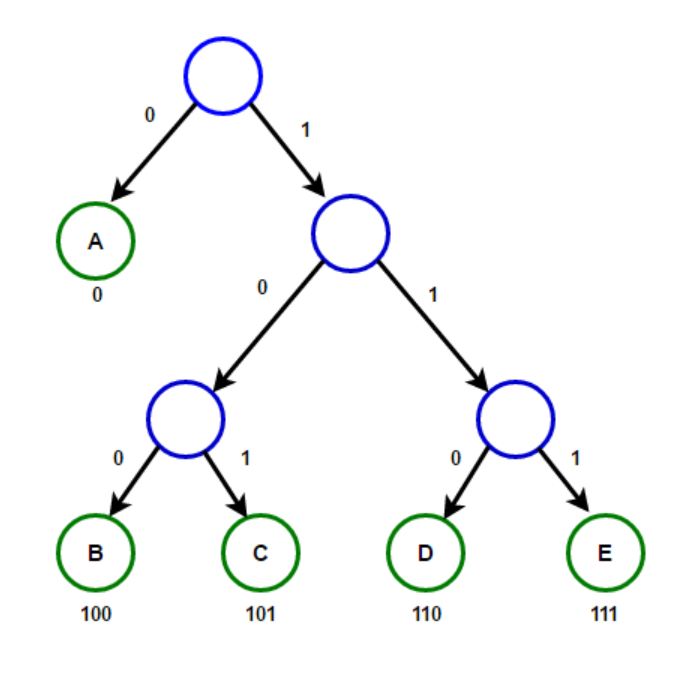

Once the tree is constructed, assigning the final codes (prefixes) is as simple as starting from the root node and following the left or right direction. Each left adds a 0 to the final code. Each right adds a 1.


### Example Code to Visualize a Binary Tree

In [1]:
import matplotlib.pyplot as plt

class Node:
    def __init__(self, value, down_text = None):
        self.value = value
        self.down_text = down_text
        self.left = None
        self.right = None

def draw_binary_tree(node, x, y, x_diff, ax):
    if node is not None:
        ax.text(x - 0.05, y - 0.2, node.value, bbox={'facecolor': 'white', 'alpha': 0.7, 'pad': 8})
        if node.down_text is not None:
            ax.text(x - 0.05, y - 0.6, node.down_text)
        else:
            ax.text(x - 0.2, y - 0.7, '0')
            ax.text(x + 0.2, y - 0.7, '1')
        
        if node.left is not None:
            ax.plot([x, x - x_diff], [y, y - 1], 'k-')
            draw_binary_tree(node.left, x - x_diff, y - 1, x_diff / 2, ax)
            
        if node.right is not None:
            ax.plot([x, x + x_diff], [y, y - 1], 'k-')
            draw_binary_tree(node.right, x + x_diff, y - 1, x_diff / 2, ax)


def display_binary_tree(create_binary_tree):
    root = create_binary_tree()

    fig, ax = plt.subplots()
    ax.axis('off')

    draw_binary_tree(root, 0, 0, 2, ax)

    plt.show()

### Huffman Binary Tree Example

Here is an example of the tree shown above constructed using Matplotlib

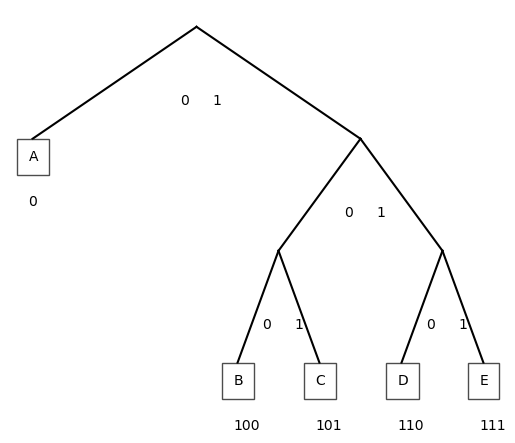

In [2]:
def create_binary_tree_example():
    # Create the nodes
    root = Node('')
    internal_node_1 = Node('')
    internal_node_2 = Node('')
    internal_node_3 = Node('')
    leaf_a = Node('A', '0')
    leaf_b = Node('B', '100')
    leaf_c = Node('C', '101')
    leaf_d = Node('D', '110')
    leaf_e = Node('E', '111')


    # Connect the nodes
    root.left = leaf_a
    root.right = internal_node_1
    internal_node_1.left = internal_node_2
    internal_node_1.right = internal_node_3
    internal_node_2.left = leaf_b
    internal_node_2.right = leaf_c
    internal_node_3.left = leaf_d
    internal_node_3.right = leaf_e
    
    return root

display_binary_tree(create_binary_tree_example)

Other trees can be constructed, although somewhat manually using the approach, given above.

## Huffman Codec Implementation

### Overview

The following is a Huffman codec (encoder/decoder) implementation in Python. The codec is compact and consists of 2 classes and one helper function. The Node class represents a single node on the binary tree. The HuffmanCodec class has two recursive internal methods for encoding and decoding a string. It also has two user-facing methods for passing the data and receiving the result.

The class itself doesn't print any data on the console. It is strictly data-in and data-out driven with a simple, clear API.

The encode method exposes the tree structure serialized using the pickle Python library, the character frequency dictionary (Huffman code book) and the encoded text itself (the bits, represented as a string).

The final helper function is used simply to calculate and display the compression ratio.

### Assumptions

One of the main assumptions is that only text is being encoded. Of course, this is not a requirement for a successful Huffman implmentation. Different kinds of data can be encoded using the Huffman algorithm. For simplicity, the example below is given with standard English letters.

No such limitations exist in practical applications like Deflate (PKZIP's algorithm) and multimedia codecs such as JPEG and MP3 have a front-end model and quantization followed by the use of prefix codes; these are often called "Huffman codes" even though most applications use pre-defined variable-length codes rather than codes designed using Huffman's algorithm.

### Encoding 

The imlementation first scans all characters in the input text. Then a frequency map for each character is constructed. 

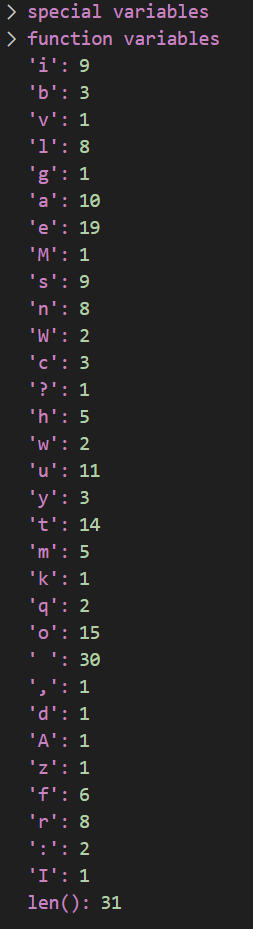

After this a list of Node objects is created, according to the frequency of each character. This list is then inserted into a heap queue, also known as priority queue. The heapq Python library is used.

Then the Huffman algorithm itself, described earlier, is applied. The Node class has the comparison method overriden, so the "priority" part of the priority queue can be executed correctly and the queue is sorted. After this the actual construction of the tree happens in a loop.

Once the tree is constructed, three variables are returned:

* the encoded text itself, represented as 0 and 1 in a string
* the Huffman code book: used only for displaying purposes
* the Huffman tree, serialized as a byte stream, using the pickle Python serialization library

This is the Huffman code book:

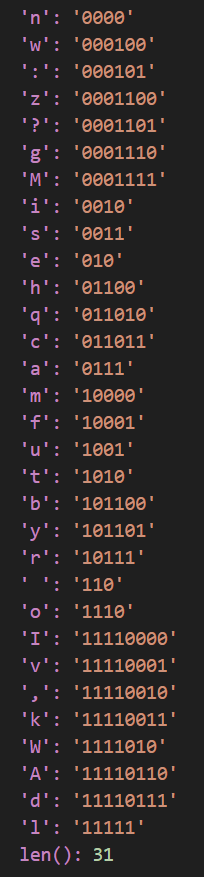

### Storing The Huffman Tree: Implementation Limitation

Once the tree is built, it should be stored and transmitted together with the encoded text as it is used for decoding. The frequency of each letter doesn't need to be stored. That's why the Node class has two method related to the pickle library. They remove the freq attribute as storing it is not needed.

Only the relations between the nodes and their values.

Due to time constraints, the Huffman tree is not stored efficiently. As pickle serializes a lot of unimportant information using too much data, the actual serialized Huffman tree takes a lot of space. If required, a better implementation can be provided that will greatly improve this inefficiency.

An efficient way of storing the Huffman tree is detailed online. [12]

### Separating Huffman Tree From The Encoded String

In the example below after the encoding takes place, the decoding function takes two arguments - the serialized Huffman tree and the encoded text itself. In a real world those two will have to be serialized in a way that can separate them. This is not done here due to time constraints. A simple solution would be to transmit:

* the size of the serialized Huffman tree
* the serialized Huffman tree itself
* the encoded stream 

### Decoding

The decoding method takes the separated serialized Huffman tree and the encoded text itself. 

The algorithm follows each 0 or 1 in the encoded string. This results in going left or right from the root node of the Huffman tree. This is done recursively. Eventually a leaf is reached. Then the character, corresponding to this leaf is decoded. 

## Source Code

In [3]:
# Huffman Coding in Python

import heapq
from heapq import heappop, heappush
import pickle
 
# A Tree node
class Node:
    def __init__(self, ch, freq, left=None, right=None):
        self.ch = ch
        self.freq = freq
        self.left = left
        self.right = right
 
    # Override the `__lt__()` function to make `Node` class work with priority queue
    # such that the highest priority item has the lowest frequency
    def __lt__(self, other):
        return self.freq < other.freq
    
    def is_leaf(self):
        return self.left is None and self.right is None
    
    def __getstate__(self):
        state = self.__dict__.copy()
        # Don't pickle freq
        del state["freq"]
        return state

    def __setstate__(self, state):
        self.__dict__.update(state)
        # Add freq back since it doesn't exist in the pickle
        self.freq = 0
 
class HuffmanCodec:

    def __init__(self): 
        self.decoded_text = ''

    # Traverse the Huffman Tree and store Huffman Codes in a dictionary
    def encode(self, root, s, huffman_code):
    
        if root is None:
            return
    
        # found a leaf node
        if root.is_leaf():
            huffman_code[root.ch] = s if len(s) > 0 else '1'
    
        HuffmanCodec.encode(self, root.left, s + '0', huffman_code)
        HuffmanCodec.encode(self, root.right, s + '1', huffman_code)
    
    
    # Traverse the Huffman Tree and decode the encoded string
    def decode(self, root, index, s):
    
        if root is None:
            return index
    
        # found a leaf node
        if root.is_leaf():
            self.decoded_text += root.ch
            return index
    
        index = index + 1
        root = root.left if s[index] == '0' else root.right
        return HuffmanCodec.decode(self, root, index, s)
    
    def build_huffman_tree(self, text):
        # count the frequency of appearance of each character and store it in a dictionary
        char_to_freq = {i: text.count(i) for i in set(text)}
    
        # Create a priority queue to store live nodes of the Huffman tree.
        pq = [Node(k, v) for k, v in char_to_freq.items()]
        heapq.heapify(pq)
    
        # do till there is more than one node in the queue
        while len(pq) != 1:
    
            # Remove the two nodes of the highest priority (the lowest frequency) from the queue
    
            left = heappop(pq)
            right = heappop(pq)
    
            # create a new internal node with these two nodes as children and
            # with a frequency equal to the sum of the two nodes' frequencies.
            # Add the new node to the priority queue.
    
            total = left.freq + right.freq
            heappush(pq, Node(None, total, left, right))
    
        # `root` stores pointer to the root of Huffman Tree
        root = pq[0]
        return root

    def build_huffman_code_book(self, root):
        # traverse the Huffman tree and store the Huffman codes in a dictionary
        huffman_code_book = {}
        HuffmanCodec.encode(self, root, '', huffman_code_book)
        return huffman_code_book

    # Builds Huffman Tree and decodes the given input text
    def encodeText(self, text):
    
        # base case: empty string
        if len(text) == 0:
            return
    
        root = HuffmanCodec.build_huffman_tree(self, text)
        huffman_code_book = HuffmanCodec.build_huffman_code_book(self, root)
    
        encoded_text = ''
        for c in text:
            encoded_text += huffman_code_book.get(c)

        serialized_huffman_tree = pickle.dumps(root)

        return serialized_huffman_tree, encoded_text, huffman_code_book
    
    def decodeText(self, serialized_huffman_tree, encoded_text):
        root = pickle.loads(serialized_huffman_tree)

        self.decoded_text = ''
        if root.is_leaf():
            # Special case: For input like a, aa, aaa, etc.
            while root.freq > 0:
                self.decoded_text += root.ch
                root.freq = root.freq - 1
        else:
            # traverse the Huffman Tree again and this time, decode the encoded string
            index = -1
            while index < len(encoded_text) - 1:
                index = HuffmanCodec.decode(self, root, index, encoded_text)
        return self.decoded_text

def print_compression_ratio(text, encoded_text):
    text_size = len(text) * 8
    encoded_text_size = len(encoded_text)

    print('Original text size (bits):', text_size)
    print('Encoded text size (bits):', encoded_text_size)
    print('Compression ratio (%):', round((encoded_text_size / text_size) * 100))


### Huffman Codec Example

In [4]:
original_text = "Marcus Aurelius quote: Whenever you are about to find fault with someone, ask yourself the following question: What fault of mine most nearly resembles the one I am about to criticize?"

huffman_codec = HuffmanCodec()
serialized_huffman_tree, encoded_text, huffman_code_book = huffman_codec.encodeText(original_text)

 # print the Huffman codes
print('Original text:', original_text)
print('Huffman code book:', huffman_code_book)
print('Serialized Huffman tree lenght, inefficient (bits):', len(serialized_huffman_tree) * 8)
print('Huffman encoded text (bits):', encoded_text)

decoded_text = huffman_codec.decodeText(serialized_huffman_tree, encoded_text)
print('Huffman decoded text:', decoded_text)

print_compression_ratio(original_text, encoded_text)

Original text: Marcus Aurelius quote: Whenever you are about to find fault with someone, ask yourself the following question: What fault of mine most nearly resembles the one I am about to criticize?
Huffman code book: {'r': '0000', 'l': '0001', 's': '0010', 'i': '0011', 'e': '010', 'z': '0110000', ',': '0110001', 'b': '011001', 'h': '01101', 'a': '0111', 'm': '10000', 'f': '10001', 'u': '1001', 't': '1010', 'y': '101100', 'c': '101101', ':': '1011100', 'v': '10111010', 'M': '10111011', 'A': '10111100', '?': '10111101', 'k': '10111110', 'I': '10111111', ' ': '110', 'o': '1110', 'q': '1111000', 'g': '11110010', 'd': '11110011', 'W': '1111010', 'w': '1111011', 'n': '11111'}
Serialized Huffman tree lenght, inefficient (bits): 9888
Huffman encoded text (bits): 10111011011100001011011001001011010111100100100000100001001110010010110111100010011110101001010111001101111010011010101111101010111010010000011010110011101001110011100000101100111011001111010011010110101011101101000100111111111110011

### Huffman Coding Efficiency

As can be seen from the example above, the average Huffman compression efficiency for regular English text is about 54%. Experiments with longer or shorter text lead to a similiar effect. Of course a text with many repeating characters like AAAAAAAAA, BBBBBBBBBBBBB and so on will lead to a much better compression.

However, the Huffman tree should be transmitted as well for successful decompression. So the real efficiency for English for example in the real world will be lower than 54%. However, as the number of characters is limited, the relative size of the tree will be similiar for short and for very long texts. This means that very long text will be closer to 54% as the tree will be a small percentage of all the required bits.

On the countraty, smaller textx will require many bits to represent the binary tree, so they will have worse compression ratio.

### Further Improvements

#### Huffman Variations

The current implementation requires the text to be known in advance before starting the encoding. This is needed as the frequency of each letter is calculated in advance. In essense the tree is constructed before the encoding begins. This has at least two shortcomings:

* It is impossible to encode a stream which has no end and is a sequence of characters
* The frequency of the characters can change in different parts of the encoded text

Adaptive Huffman coding solves those problems. [8]

It permits building the code as the symbols are being transmitted, having no initial knowledge of source distribution, that allows one-pass encoding and adaptation to changing conditions in data.

The benefit of one-pass procedure is that the source can be encoded in real time, though it becomes more sensitive to transmission errors, since just a single loss ruins the whole code, requiring error detection and correction.

There are a number of implementations of this method, the most notable are FGK (Faller-Gallager-Knuth) and Vitter algorithm.

#### Tree Storage and Transmission

As discussed earlier, currently the Huffman tree is serialized and stored in an inefficient manner. This can definitely be improved. Also, separation between the Huffman tree and the encoded text in a single serialized stream needs to be implemented.

## Other Lossless Compression Algorithms

LZ77 and LZ78 are the two lossless data compression algorithms published in papers by Abraham Lempel and Jacob Ziv in 1977 and 1978.

They are both theoretically dictionary coders. LZ77 maintains a sliding window during compression. This was later shown to be equivalent to the explicit dictionary constructed by LZ78—however, they are only equivalent when the entire data is intended to be decompressed.

Since LZ77 encodes and decodes from a sliding window over previously seen characters, decompression must always start at the beginning of the input.

LZ78 was created by Lempel and Ziv in 1978, hence the abbreviation. Rather than using a sliding window to generate the dictionary, the input data is either preprocessed to generate a dictionary wiith infinite scope of the input, or the dictionary is formed as the file is parsed. 

Conceptually, LZ78 decompression could allow random access to the input if the entire dictionary were known in advance. However, in practice the dictionary is created during encoding and decoding by creating a new phrase whenever a token is output. [4]

The following is a greatly simplifyed LZ77 compression example: [7]

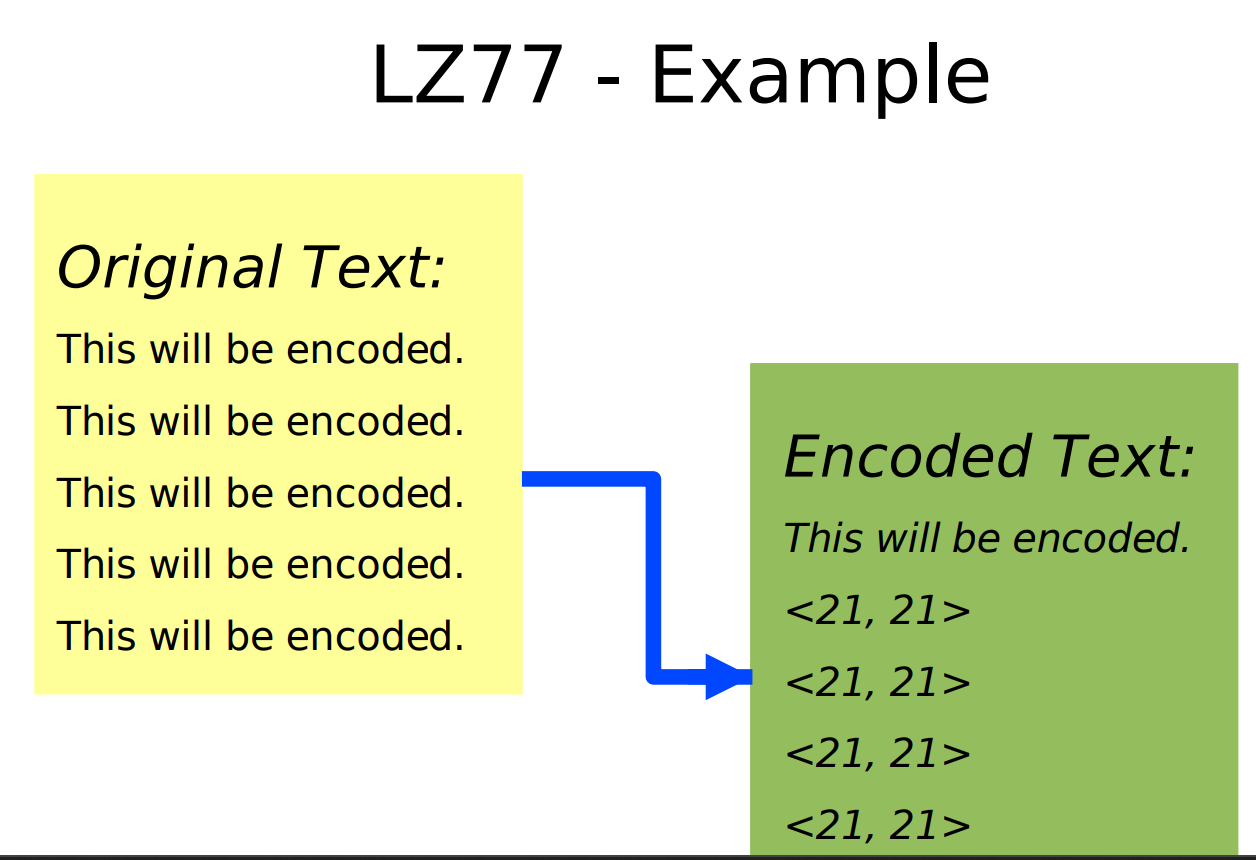

An improvement of LZ77 and LZ78 is the LZW algorithm from 1984 by Terry Welch. It removes redundant characters in the output and makes the output entirely out of pointers. It also includes every character in the dictionary before starting compression, and employs other tricks to improve compression such as encoding the last character of every new phrase as the first character of the next phrase. LZW is commonly found in the Graphics Interchange Format (GIF). [9]

Many other lossless algorithms are based on LZ77/LZ78 in one way or another. [5]

## Comparison Between Huffman and Other Lossless Compression Algorithms

Letter-oriented Huffman is good at detecting and compressing files using the letter frequencies alone, but it cannot detect correlations between consecutive letters (common words and syllables).

In English, the 2 most common letters are (usually) 'e' and then 't'. So what is the most common pair? You might guess "ee", "et", or "te" -- nope, it's "th".

LZ77 is good at detecting and compressing these kinds of common words and syllables that occur far more often than you might guess from the letter frequencies alone.

In general, most data compression software is made up of these 2 parts. First they run the original data through a "transformation" or multiple transformations, also called "decorrelators", typically highly tuned to the particular kind of redundancy in the particular kind of data being compressed (JPEG's DCT transform, MPEG's motion-compensation, etc.) or tuned to the limitations of human perception (MP3's auditory masking, etc.). Next they run the intermediate data through a single "entropy coder" (arithmetic coding, or Huffman coding, or asymmetric numeral system coding) that's pretty much the same for every kind of data. [6]

For example the DEFLATE algorithm combines LZ77 and Huffman coding. GZIP uses the same combined approach: [7]

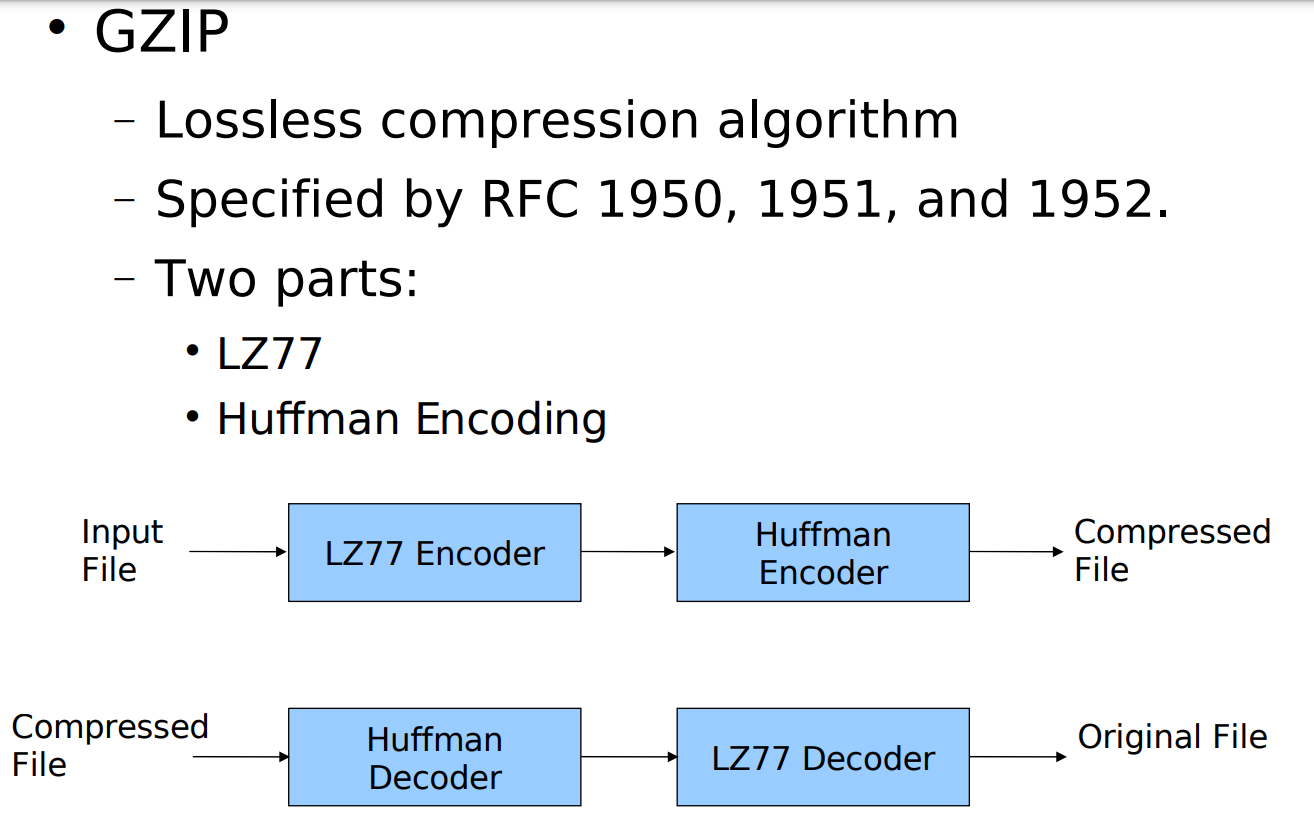

## Conclusion

A brief instroduction into lossless and lossy coding was given to lay the foundation for understanding the Huffman coding algorithm. Also a simple binary tree visualization with the source code was presented.

A simple Huffman compression algorithm implementation was presented together with detailed explanation how the encoding and the decoding work. The implementation is not optimal and the Huffman tree is not serialized in an efficient manner, but this can be improved in the future. 

Huffman coding has wide applications, is very simple and can be understood even by inexperienced software developers. It is a different form of lossless coding relative to sliding window and point-of-reference dictionary algorithms like LZ77, LZ78 and their variations.

However, in most practical applications, Huffman coding or other forms or entropy coding is combined with algorithms like LZ77, LZ78 to achieve the best of both approaches.


## References

[1] Huffman Coding | Greedy Algo-3, https://www.geeksforgeeks.org/huffman-coding-greedy-algo-3/

[2] Huffman Coding Compression Algorithm, https://www.techiedelight.com/huffman-coding/

[3] Huffman Coding, https://en.wikipedia.org/wiki/Huffman_coding

[4] LZ77 and LZ78, https://en.wikipedia.org/wiki/LZ77_and_LZ78\

[5] Lempel–Ziv–Welch, https://en.wikipedia.org/wiki/Lempel%E2%80%93Ziv%E2%80%93Welch

[6] Why to combine Huffman and LZ77?, https://stackoverflow.com/questions/55547113/why-to-combine-huffman-and-lz77

[7] GZIP Encoding, http://csg.csail.mit.edu/6.375/6_375_2007_www/projects/group6_final_presentation.pdf

[8] Adaptive Huffman coding, https://en.wikipedia.org/wiki/Adaptive_Huffman_coding

[9] History of Lossless Data Compression Algorithms, https://ethw.org/History_of_Lossless_Data_Compression_Algorithms

[10] Information theory, https://en.wikipedia.org/wiki/Information_theory

[11] Entropy coding, https://en.wikipedia.org/wiki/Entropy_coding

[12] Efficient way of storing Huffman tree, https://stackoverflow.com/questions/759707/efficient-way-of-storing-huffman-tree